# Regresja

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

Rozważmy zbiór Boston

In [5]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [6]:
# get the data
boston_X = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
boston_Y = boston.values[1::2, 2]

Podzielmy zbiór na część testową i treningową .

In [7]:
# Split the data into training/testing sets
boston_X_train = boston_X[:-50]
boston_X_test = boston_X[-50:]
 
# Split the targets into training/testing sets
boston_y_train = boston_Y[:-50]
boston_y_test = boston_Y[-50:]

In [8]:
X=boston_X_train
y=boston_y_train

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy.


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

seed=123
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)


In [10]:
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'elasticnet__alpha': [0.01, 0.1, 1, 10]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X, y)
grid_1.best_params_

c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1470.3391497521407, tolerance: 3.4242486895604394
  model = cd_fast.enet_coordinate_descent(
c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1295.58614319286, tolerance: 3.142356865753425
  model = cd_fast.enet_coordinate_descent(
c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1315.2070549367, tolerance: 3.079096421917808
  model = cd_fast.enet_coordinate_descent(
c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinat

{'elasticnet__alpha': 0.1, 'polynomialfeatures__degree': 2}

In [11]:
grid_1.cv_results_['mean_test_score'].reshape(4, -1)

array([[0.70805942, 0.81680208, 0.74702819, 0.63462343],
       [0.70014515, 0.83003047, 0.73343859, 0.63043122],
       [0.66429641, 0.82359064, 0.75795199, 0.61636726],
       [0.52367919, 0.80580758, 0.7581234 , 0.61997622]])

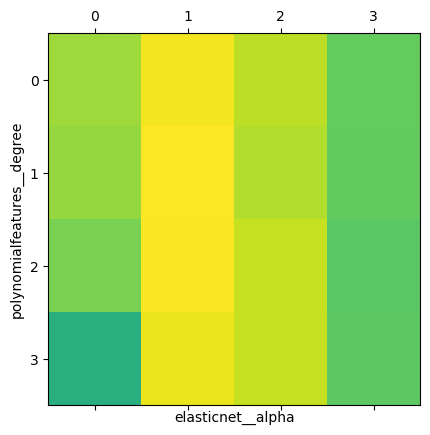

In [25]:
plt.matshow(grid_1.cv_results_['mean_test_score'].reshape(4, -1),
vmin=0, cmap="viridis")
plt.xlabel("elasticnet__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.show()

In [27]:
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'lasso__alpha': [0.01, 0.1, 1, 10]},
                    cv=kfold,
                    refit=True)
grid_2.fit(X, y)
grid_2.best_params_

c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1459.026086266796, tolerance: 3.4242486895604394
  model = cd_fast.enet_coordinate_descent(
c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1283.6082918170994, tolerance: 3.142356865753425
  model = cd_fast.enet_coordinate_descent(
c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1310.2393314381459, tolerance: 3.079096421917808
  model = cd_fast.enet_coordinate_descent(
c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coord

{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 2}

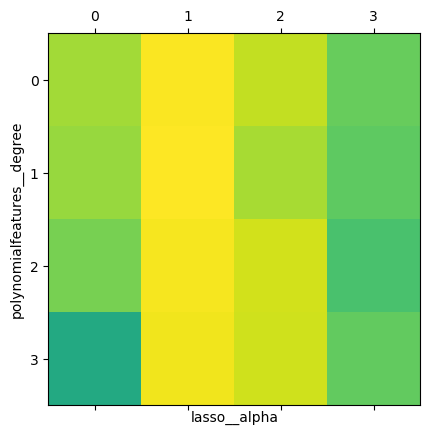

In [28]:
grid_2.cv_results_['mean_test_score'].reshape(4, -1)

plt.matshow(grid_2.cv_results_['mean_test_score'].reshape(4, -1),
vmin=0, cmap="viridis")
plt.xlabel("lasso__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.show()

In [29]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'ridge__alpha': [0.01, 0.1, 1, 10]},
                    cv=kfold,
                    refit=True)
grid_3.fit(X, y)
grid_3.best_params_

c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
c:\Users\rafal\m

{'polynomialfeatures__degree': 2, 'ridge__alpha': 0.01}

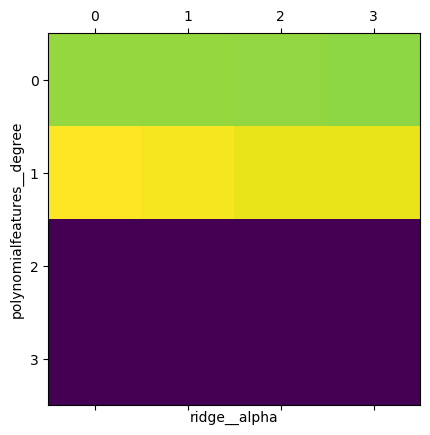

In [30]:
grid_3.cv_results_['mean_test_score'].reshape(4, -1)

plt.matshow(grid_3.cv_results_['mean_test_score'].reshape(4, -1),
vmin=0, cmap="viridis")
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.show()

In [13]:
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]},
                    cv=kfold,
                    refit=True)
grid_4.fit(X, y)
grid_4.best_params_

c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1459.026086266796, tolerance: 3.4242486895604394
  model = cd_fast.enet_coordinate_descent(
c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1283.6082918170994, tolerance: 3.142356865753425
  model = cd_fast.enet_coordinate_descent(
c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1310.2393314381459, tolerance: 3.079096421917808
  model = cd_fast.enet_coordinate_descent(
c:\Users\rafal\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coord

{'polynomialfeatures__degree': 2}

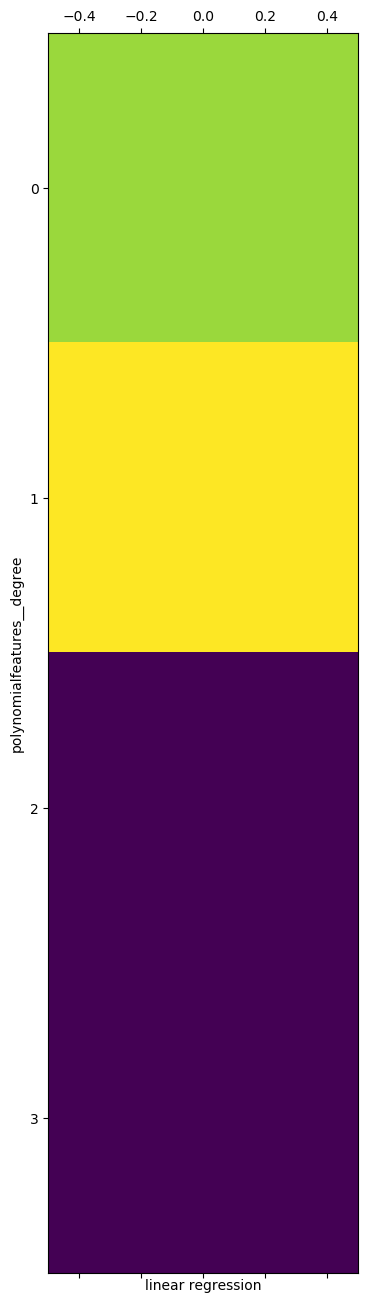

In [31]:
grid_4.cv_results_['mean_test_score'].reshape(4, -1)

plt.matshow(grid_4.cv_results_['mean_test_score'].reshape(4, -1),
vmin=0, cmap="viridis")
plt.xlabel("linear regression")
plt.ylabel("polynomialfeatures__degree")
plt.show()

In [16]:
from sklearn import  metrics

X_test=boston_X_test
y_test=boston_y_test

models = []
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

ElasticNet
R^2: -1.2894183199282097
Explained variance score: -1.2715409278403205
Median absolute error: 3.5151830600257927
Mean squared error: 43.18506882697383
Mean absolute errors: 4.829785092668605
Lasso
R^2: -1.3405620930677804
Explained variance score: -1.3336502428326442
Median absolute error: 3.6534388293894438
Mean squared error: 44.149788705328234
Mean absolute errors: 4.883117498278221
Ridge
R^2: -2.084504574498415
Explained variance score: -1.8561486256399062
Median absolute error: 2.622454485385683
Mean squared error: 58.18270133830616
Mean absolute errors: 4.910184983509465
LR
R^2: -3.4407949207295703
Explained variance score: -2.7291053937678043
Median absolute error: 3.38043874502182
Mean squared error: 83.76627051022983
Mean absolute errors: 5.7799199037551885


In [17]:
import pandas as pd
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['ElasticNet', 'Lasso', 'Ridge', 'LR'])#,'Lasso','Ridge','LR'])
df

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,ElasticNet,-1.289418,-1.271541,3.515183,43.185069,4.829785
1,Lasso,-1.340562,-1.333650,3.653439,44.149789,4.883117
2,Ridge,-2.084505,-1.856149,2.622454,58.182701,4.910185
3,LR,-3.440795,-2.729105,3.380439,83.766271,5.779920
